In [257]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
import spacy
import os
import matplotlib.pyplot as plt

In [258]:
# print(spacy.__version__)
!py -m spacy download ru_core_news_sm

     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.3 MB 1.3 MB/s eta 0:00:12
     ---------------------------------------- 0.1/15.3 MB 1.3 MB/s eta 0:00:12
      --------------------------------------- 0.3/15.3 MB 2.0 MB/s eta 0:00:08
      --------------------------------------- 0.4/15.3 MB 2.1 MB/s eta 0:00:08
     - -------------------------------------- 0.6/15.3 MB 2.8 MB/s eta 0:00:06
     -- ------------------------------------- 0.8/15.3 MB 3.0 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     ---- ----------------------------------- 1.5/15.3 MB 3.6 MB/s eta 0:00:04
     ----- ---------------------------------- 2.2/15.3 MB 4.4 MB/s eta 0:00:03
     ------ --------------------------------- 2.4/15.3 MB 4

In [259]:
nltk.download('averaged_perceptron_tagger') #для pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [260]:
nlp = spacy.load('ru_core_news_sm')
stop = stopwords.words("russian")

In [261]:
def clean_tokenizer(adress):
    text = open(adress, "r", encoding = "utf-8").read()
    text = WhitespaceTokenizer().tokenize(text)
    words_filtered = [word for word in text if word not in stop]

    new = []
    for word in words_filtered:
        if "\n" in word or "I" in word or "--" in word\
                        or "—" in word or chr(8211) in word:
            words_filtered.remove(word)
            continue
        if "." in word:
            word = word.replace(".", "")
            if "." in word:
                word = word.replace(".", "")
                if "." in word:
                    word = word.replace(".", "")
        if "," in word or "!" in word or "?" in word or ":" in word:
            word = word.replace("!", "")
            word = word.replace(",", "")
            word = word.replace("?", "")
            word = word.replace(":", "")
        if "\"" in word or "--" in word:
            word = word.replace("\"", "")
            word = word.replace("--", "")
        new.append(word)
    return new


In [262]:
d = {}
for filename in os.scandir("6_texts"):
        d["{}".format(filename.name)] = clean_tokenizer(filename.path)      
#я не спёрла из интернета, я подсмотрела и научилась
d.keys()

dict_keys(['1_anton_yabl_tok_1895.txt', '2_suhodol_1909_tok.txt', '3_nochnoy_razg_1911_tok.txt', '4_gospodin_iz_sanfran_tok_1915.txt', '5_zhizn_arsen_1928_tok.txt', '6_pozniy_chas_1938_tok.txt'])

**Лексическое разнообразие** <br>

<BarContainer object of 6 artists>

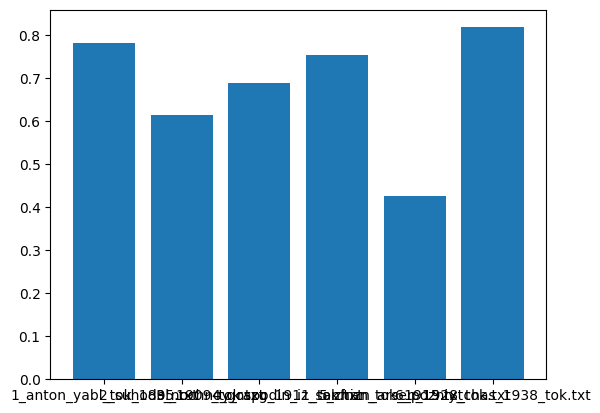

In [263]:
def word_variety (text):
    unique = len(set(text))/len(text)
    return unique

texts_v = []
for key in d.keys():
    texts_v.append(word_variety(d[key]))

plt.bar(list(d.keys()), texts_v)

Вывод 1: лексическое разнообразие почти не менялось за время жизни Бунина. <br>
Но в произведении "Поздний час" оно резко возросло. Скорее всего это связано с тем, что это одно из последих прозаических произведений автора.

**Преобладающие части речи в произведениях**

In [ ]:
%pip install pymorphy2
import pymorphy3
from collections import Counter
morph = pymorphy3.MorphAnalyzer()
import numpy as np

In [265]:
def spp (text) : #spp - speech parts
    adj = []
    for word in text:
        adj.append(morph.parse(word)[0].tag.POS)
    adj2 = Counter(adj)
    return adj2.most_common(5)

texts_spp = []
for key in d.keys():
    texts_spp.append(spp(d[key]))

какие части речи будет выделять?

In [266]:
def helper(k,n):
    x = []
    y = []
    for l in texts_spp[k]:
        x.append(l[n])
    if n == 0:
        return x        
    elif n == 1:       
        for el in x:
            true_el = el/sum(x)
            y.append(true_el)
    return y

x1 = helper(0,0)
x2 = helper(1,0)
x3 = helper(2,0)
x4 = helper(3,0)
x5 = helper(4,0)
x6 = helper(5,0)

y1 = helper(0,1)
y2 = helper(1,1)
y3 = helper(2,1)
y4 = helper(3,1)
y5 = helper(4,1)
y6 = helper(5,1)

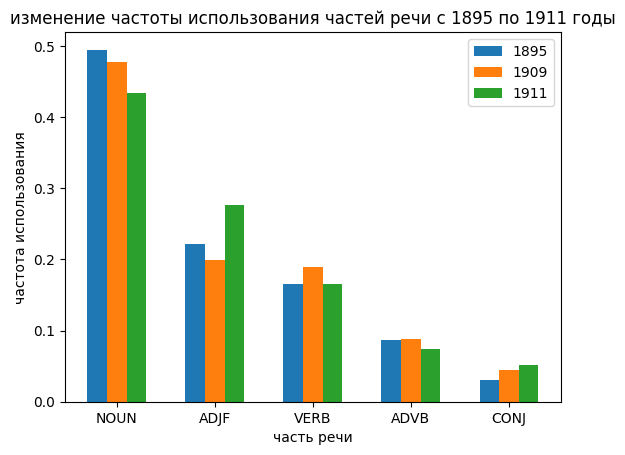

In [267]:
x_axis = np.arange(len(x1))

plt.bar(x_axis - 0.2,y1,0.2,label="1895")
plt.bar(x_axis - 0,y2,0.2,label="1909")
plt.bar(x_axis + 0.2,y3,0.2,label="1911")
plt.show

plt.xticks(x_axis, x1) 
plt.xlabel("часть речи") 
plt.ylabel("частота использования") 
plt.title("изменение частоты использования частей речи с 1895 по 1911 годы") 
plt.legend() 

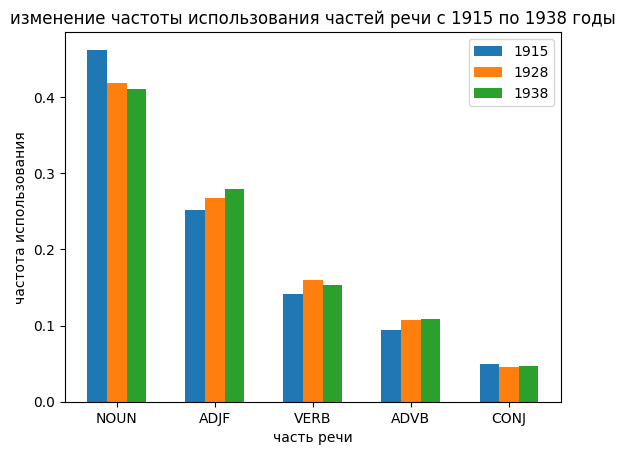

In [268]:
x_axis = np.arange(len(x1))

plt.bar(x_axis - 0.2,y4,0.2,label="1915")
plt.bar(x_axis - 0,y5,0.2,label="1928")
plt.bar(x_axis + 0.2,y6,0.2,label="1938")
plt.show

plt.xticks(x_axis, x1) 
plt.xlabel("часть речи") 
plt.ylabel("частота использования") 
plt.title("изменение частоты использования частей речи с 1915 по 1938 годы") 
plt.legend() 

Выводы: